# Stock Forecasting using Prophet (Saturating Growth)

https://facebook.github.io/prophet/

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'MRNA' # input
start = '2020-01-01' # input 
end = '2021-11-26'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,19.570000,19.809999,18.879999,19.230000,19.230000,1233600
2020-01-03,19.020000,19.360001,18.719999,18.889999,18.889999,1751000
2020-01-06,18.700001,18.740000,18.010000,18.129999,18.129999,1606500
2020-01-07,18.150000,18.320000,17.680000,17.780001,17.780001,1461400
2020-01-08,17.990000,18.080000,17.760000,17.980000,17.980000,1041600


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,246.119995,253.190002,243.789993,251.410004,251.410004,7395600
2021-11-19,265.415009,274.839996,258.089996,263.779999,263.779999,15606700
2021-11-22,268.070007,289.000000,264.200012,282.690002,282.690002,13852800
2021-11-23,277.739990,281.980011,269.179993,276.380005,276.380005,6900200
2021-11-24,273.010010,275.279999,266.309998,273.390015,273.390015,4760200


In [5]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2020-01-02,19.570000,19.809999,18.879999,19.230000,19.230000,1233600
1,2020-01-03,19.020000,19.360001,18.719999,18.889999,18.889999,1751000
2,2020-01-06,18.700001,18.740000,18.010000,18.129999,18.129999,1606500
3,2020-01-07,18.150000,18.320000,17.680000,17.780001,17.780001,1461400
4,2020-01-08,17.990000,18.080000,17.760000,17.980000,17.980000,1041600
...,...,...,...,...,...,...,...
475,2021-11-18,246.119995,253.190002,243.789993,251.410004,251.410004,7395600
476,2021-11-19,265.415009,274.839996,258.089996,263.779999,263.779999,15606700
477,2021-11-22,268.070007,289.000000,264.200012,282.690002,282.690002,13852800
478,2021-11-23,277.739990,281.980011,269.179993,276.380005,276.380005,6900200


In [6]:
df = df[['ds', 'y']]
df.head()

,ds,y
0,2020-01-02,19.230000
1,2020-01-03,18.889999
2,2020-01-06,18.129999
3,2020-01-07,17.780001
4,2020-01-08,17.980000


In [7]:
df['cap'] = 330

In [8]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


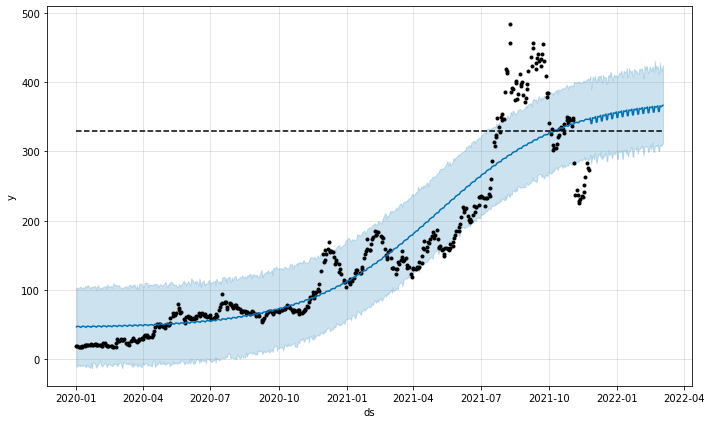

In [9]:
future = m.make_future_dataframe(periods=100)
future['cap'] = 330
fcst = m.predict(future)
fig = m.plot(fcst)

### Saturating Minimum

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


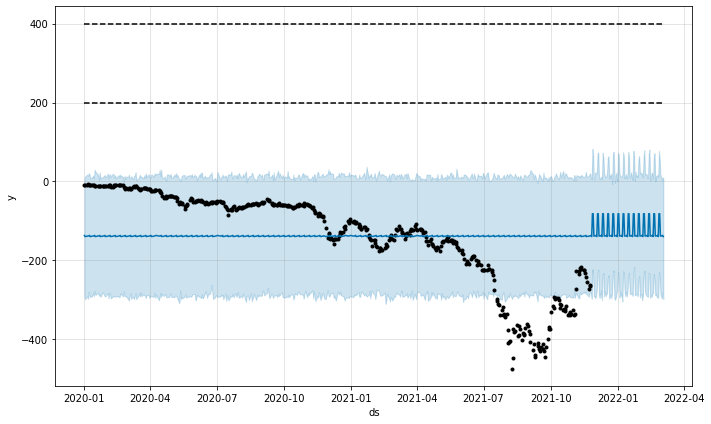

In [10]:
df['y'] = 10-df['y']
df['cap'] = 400
df['floor'] = 200
future['cap'] = 400
future['floor'] = 200
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)